In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv("/content/Cardiotocographic.csv")

In [70]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
data.tail()

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [73]:
data.shape

(2126, 14)

In [74]:
data.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [75]:
data.isnull().sum().sum()

np.int64(167)

In [76]:
data.size

29764

In [77]:
## Missing values = 167 → (167 / df.size) × 100 = 0.57%
# Since missing percentage is below 1%, it's safe to drop those rows


In [78]:
# Dropping missing values for simplicity
data = data.dropna()


In [79]:
# Convert all columns to numeric (if any are strings)
data = data.apply(pd.to_numeric, errors='coerce')
data.dtypes


,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [80]:
data.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [81]:
Q1 = data.quantile(0.25)
Q2= data.quantile(0.50)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [82]:
outliers

,0
LB,10
AC,39
FM,343
UC,13
DL,124
DS,120
DP,284
ASTV,10
MSTV,78
ALTV,317


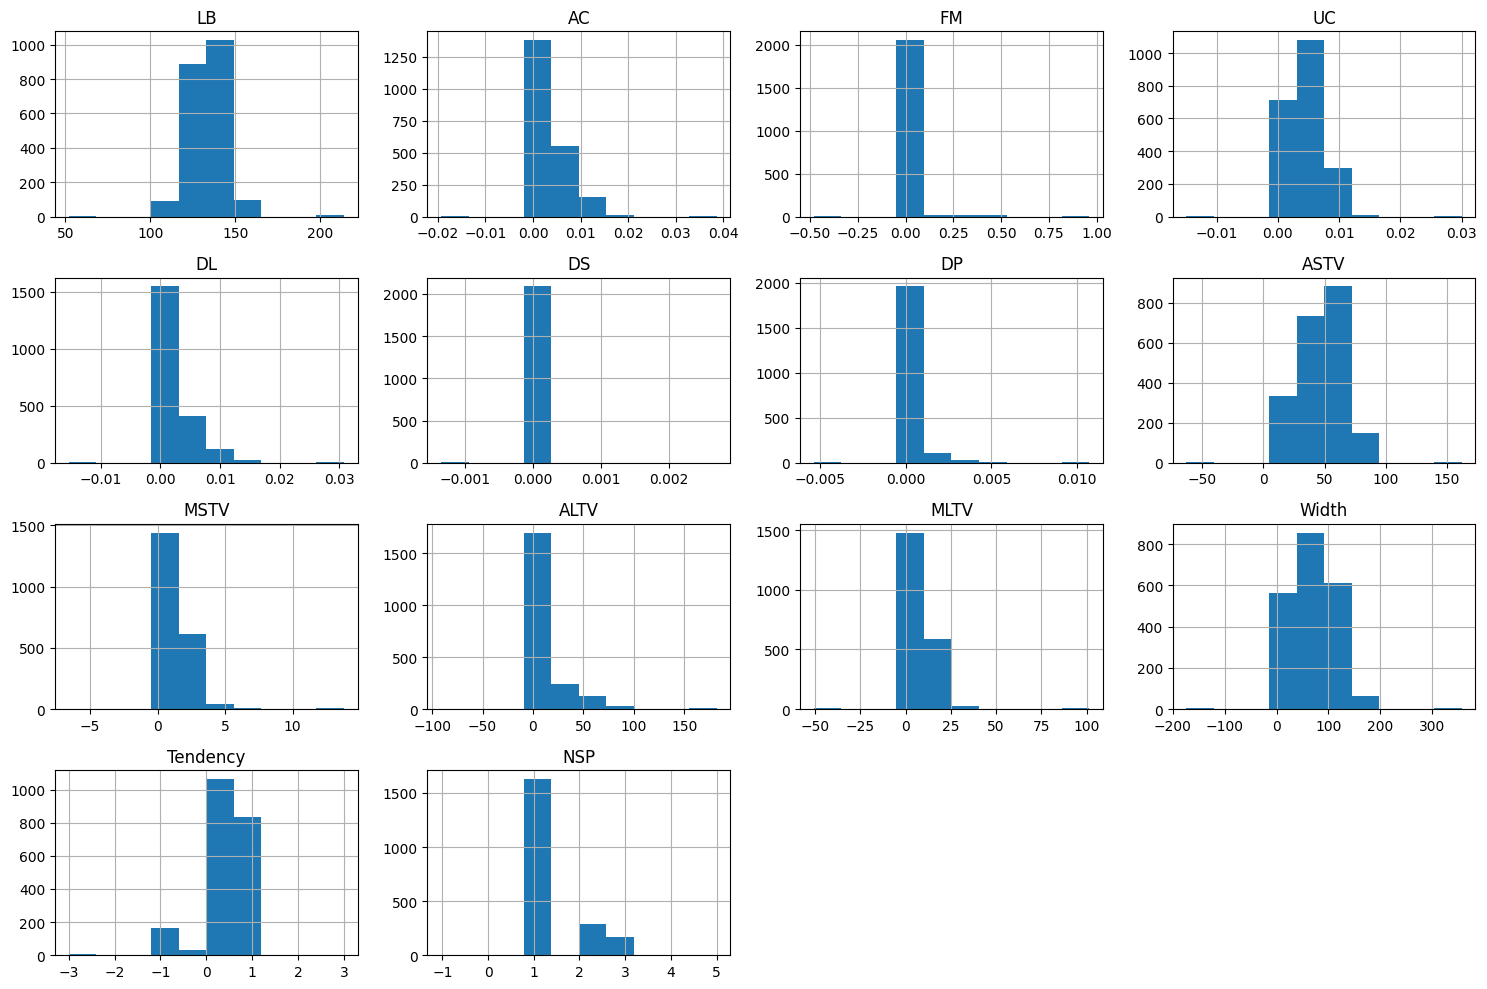

In [84]:
# Histogram
data.hist(figsize=(15, 10))
plt.tight_layout()
# tight_layout() helps to avoid ploats overlapping

<Axes: >

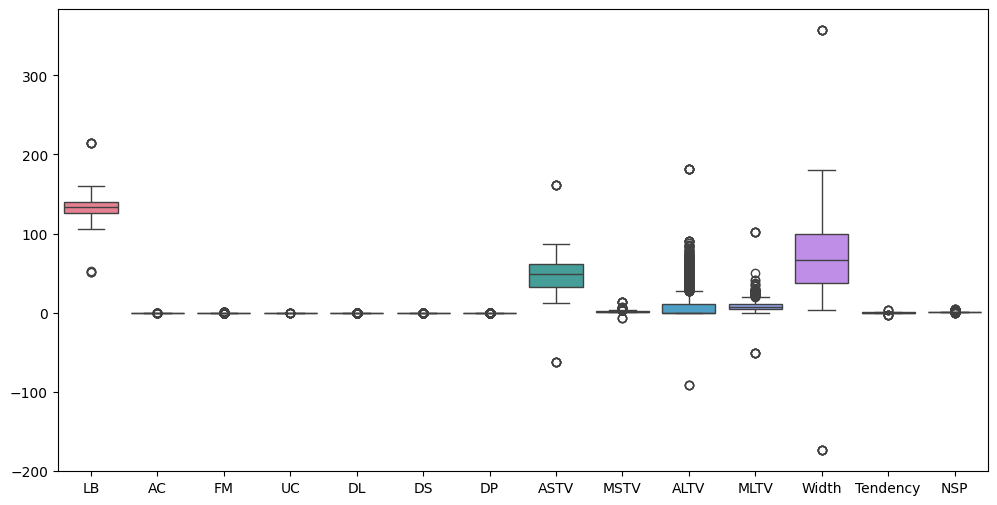

In [85]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data)

<Axes: >

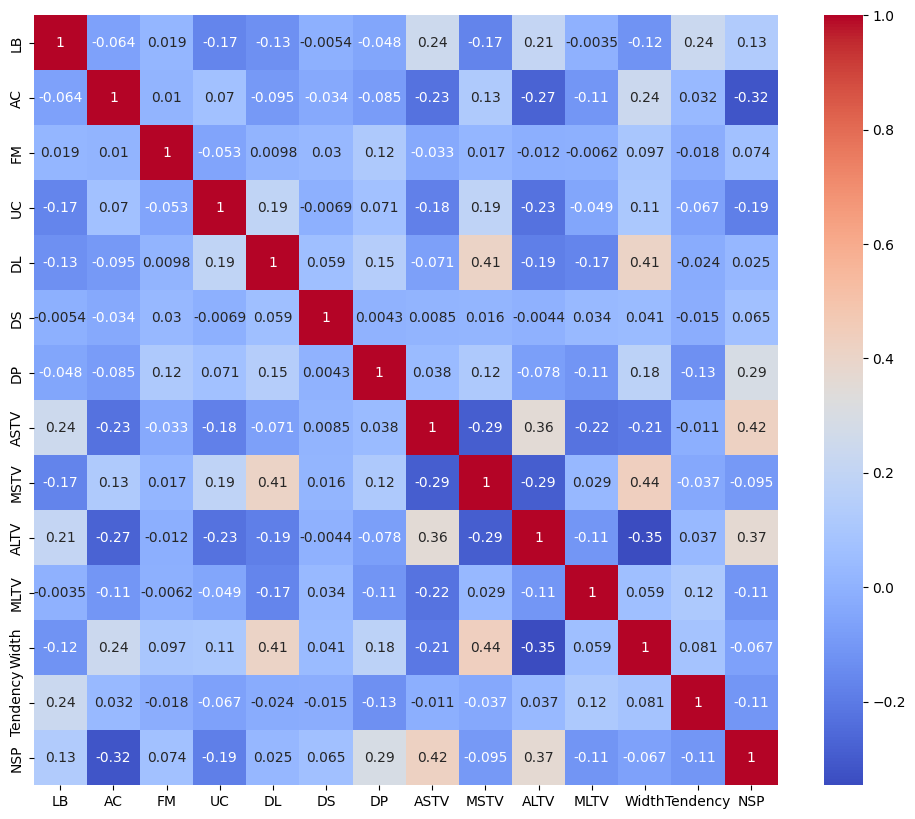

In [86]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
data

In [87]:
print(data.columns.tolist())


['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']


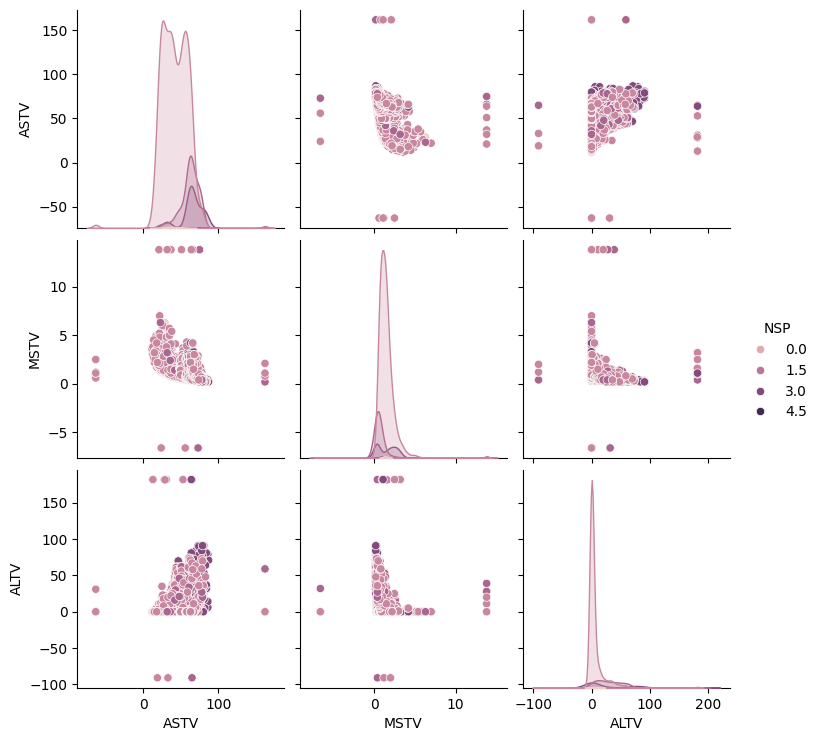

In [88]:
sns.pairplot(data[['ASTV', 'MSTV', 'ALTV', 'NSP']], hue='NSP')
plt.show()

# Shows relationships between ASTV, MSTV, ALTV and how they vary across NSP classes


In [89]:
correlation_matrix = data.corr()
correlation_matrix['NSP'].sort_values(ascending=False)

# Insight:
# ASTV has the strongest positive correlation with NSP → may be a key predictor of fetal health.
# ALTV and MSTV also show moderate correlation.
# Variables with near-zero correlation (like DL) may not be useful for classification.



,NSP
NSP,1.000000
ASTV,0.422652
ALTV,0.365846
DP,0.294472
LB,0.131843
FM,0.074054
DS,0.065400
DL,0.025427
Width,-0.067423
MSTV,-0.095139


##Conclusion
The dataset was cleaned and converted to numeric format for analysis.

Outliers were detected using the IQR method to ensure statistical integrity.

ASTV, ALTV, and MSTV show meaningful correlation with the NSP class, suggesting their importance in fetal health classification.

The pair plot revealed clear separation patterns across NSP categories, highlighting how these variables behave across Normal, Suspect, and Pathological cases.

These insights can guide further modeling, clinical decision-making, or real-time monitoring systems that prioritize fetal safety and early risk detection.
